# Исследование винного датасета

Датасет взят на kaggle: https://www.kaggle.com/datasets/zynicide/wine-reviews

импорты:

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

In [ ]:
df = pd.read_csv('drive/MyDrive/winemag-data-130k-v2.csv')
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Забавно, что оценок вина ниже 80 нет

In [ ]:
df.points.value_counts()

,count
points,
88,17207
87,16933
90,15410
86,12600
89,12226
91,11359
92,9613
85,9530
93,6489


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [ ]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


Сложно сказать, стоит ли удалять выбросы, поскольку их во-первых достаточно много, во-вторых они обоснованы. Но мы уберем все значения выше 100

<Axes: ylabel='price'>

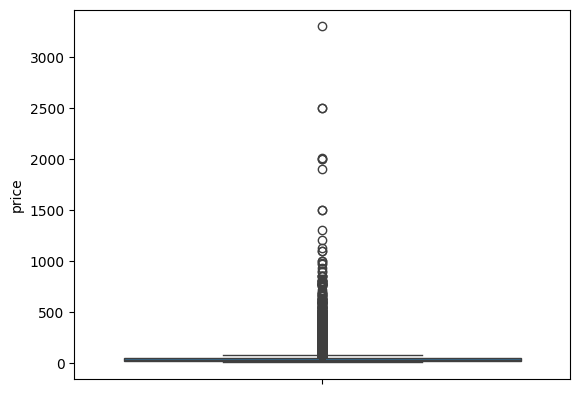

In [ ]:
sns.boxplot(df.price)

<Axes: ylabel='points'>

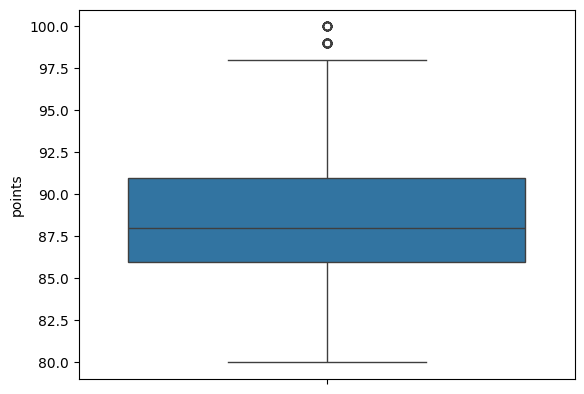

In [ ]:
sns.boxplot(df.points)

In [ ]:
index_list = df[df.price > 100].index
df = df.drop(index_list)

Заполняем пропуски в некоторых столбцах (числовых)

In [ ]:
df.price.median()

25.0

In [ ]:
df.price = df.price.fillna(df.price.median())

## Проверка на нормальное распределение.
Гистограммы \\
Распределение цены больше напоминает хи-квадрат нежели нормальное, однако для него также работают многие статистические методы, в то время как оценки распределены нормально.

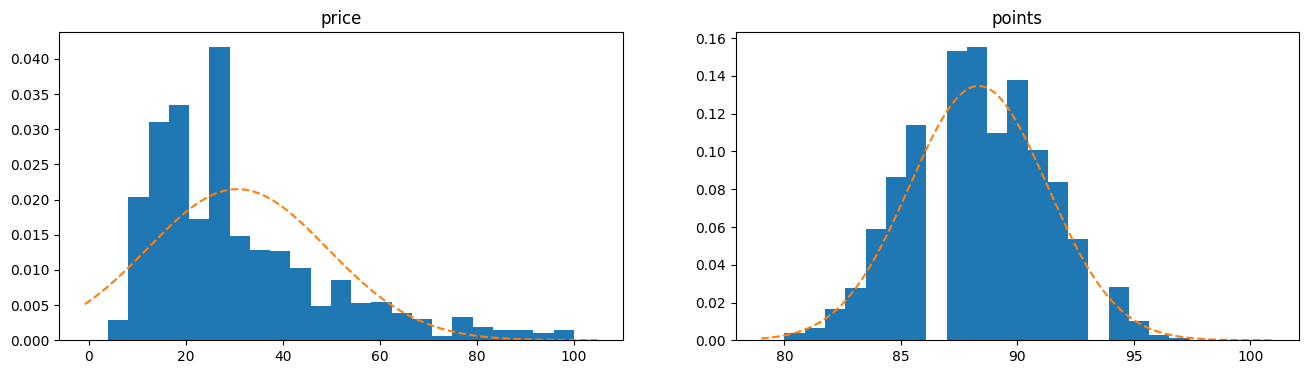

In [ ]:
keys = ['price', 'points']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=23)

    loc = df[key].mean()
    scale = df[key].std()

    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)

    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

Квантили \\
Действительно, распределение цены не нормальное, исходя из Q-Q кривой.

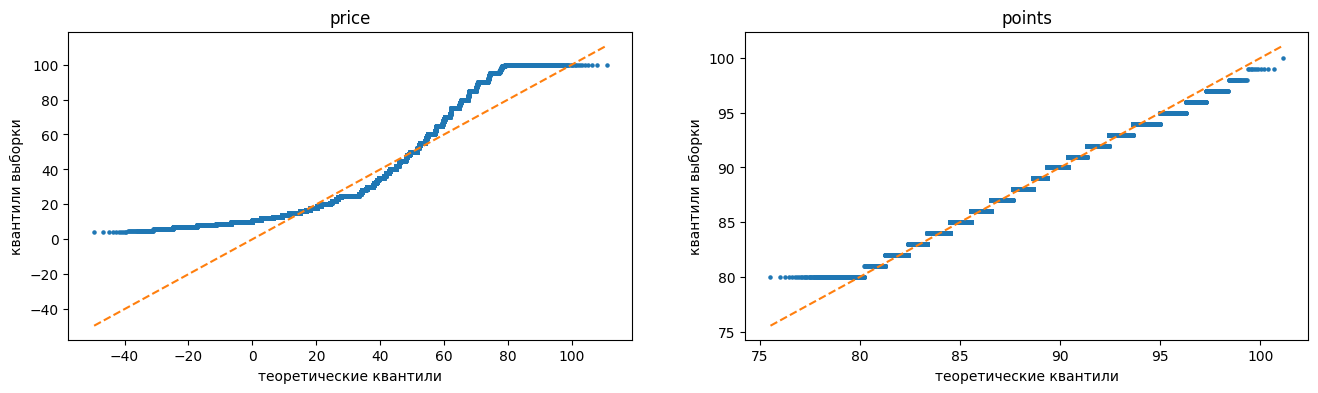

In [ ]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)

    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')

    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

Статистические показатели для выборки \\
Из матстата:

* Вероятность попасть в интервал от $\mu - \sigma$ до $\mu + \sigma$ равна $0.68$,
* В интервал от $\mu - 2\sigma$ до $\mu + 2\sigma$ — $0.95$,
* В интервал от $\mu - 3\sigma$ до $\mu + 3\sigma$ — $0.997$.

Если рассчётные цифры оказываются близки к теоретическим, то распределения можно признать нормальными. \\
Действительно, распределение оценок очень близко к нормальному.

In [ ]:
for key in keys:
    print(key)

    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]

        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')

    print()

price
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7471347893053197
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.941116069665495
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9831681213222226

points
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6703921646064531
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9644484814975712
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9996603609652067



## Регрессия между ценой и оценкой

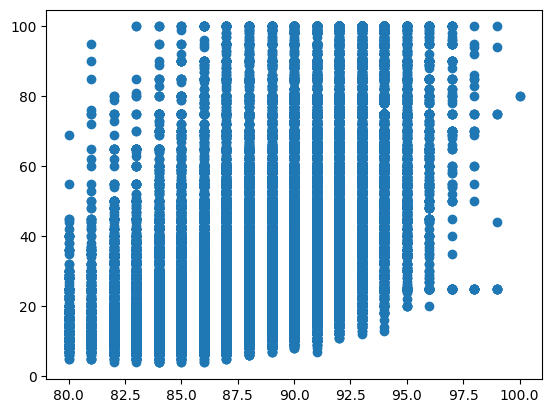

In [ ]:
plt.scatter(df['points'], df['price'])
plt.show()

## Рассчёт регрессии и проверка значимости

In [ ]:
df.shape

(126605, 14)

In [ ]:
ones = np.ones((126605,1))
x_pot = np.hstack((ones, df['points'].values.reshape(126605,1)))
XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df['price'])
z = x_pot.dot(b)
e = df['price'] - z

In [ ]:
def sum_of_squares(vector: np.ndarray) -> float:
    return ((vector - vector.mean()) ** 2).sum()

In [ ]:
reg = 1 - sum_of_squares(e) / sum_of_squares(np.array(df['price']))
reg

0.272906564492294

## Статистические тесты
Построим статистический тест с нулевой гипотезой о том, что зависимости между рейтингом и ценой нет.

F > t -> зависимость есть

In [ ]:
n = 126605
m = 1

k1 = m
k2 = n - m - 1

print(k1, k2)

alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
print(t)
F = (reg / k1) / ((1 - reg) / k2)
F

1 126603
3.8415322731040353


47519.05064345986

Визуализация

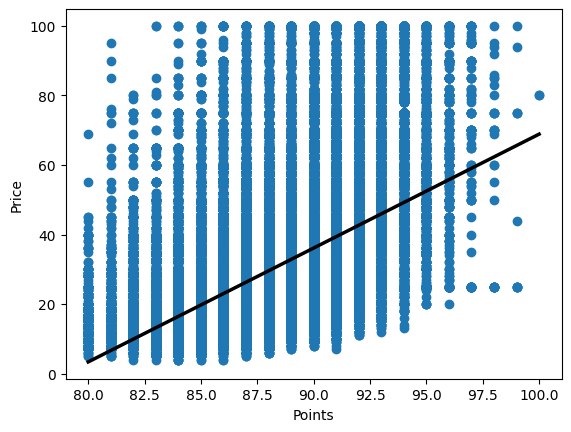

In [ ]:
plt.scatter(df['points'], df['price'], )
b, a = np.polyfit(df['points'], df['price'], deg=1)
xseq = np.linspace(80, 100, num=100)
plt.plot(xseq, a + b * xseq, color="k", lw=2.5)
plt.xlabel("Points")
plt.ylabel("Price")
plt.show()

#Дисперсионный анализ

Самым вкусным вином традиционно считается итальянское, на основе этого датасета можно проверить данный факт. Кроме того оно является одним из наиболее популярных в мире

In [ ]:
df.country.value_counts()

,count
country,
US,53460
France,21091
Italy,18864
Spain,6452
Portugal,5617
Chile,4437
Argentina,3719
Austria,3324
Australia,2236


In [ ]:
def var_analise(df, df1, df2, f):
  all1 = df1.shape[0]
  all2 = df2.shape[0]
  res1_mean = df1[f].mean()
  res2_mean = df2[f].mean()
  res_mean = df[f].mean()
  SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2
  SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum()

  k = 2
  n = all1 + all2
  k1 = k - 1
  k2 = n - k
  sigma2_b = SS_b / k1
  sigma2_w = SS_w / k2
  sigma2_b, sigma2_w

  F = sigma2_b / sigma2_w

  alpha = 0.05

  t = stats.f.ppf(1 - alpha, k1, k2)

  return F>t

In [ ]:
df_italy = df[df['country'] == 'Italy']
df_not_italy = df[df['country'] != 'Italy']

In [ ]:
var_analise(df, df_italy, df_not_italy, 'points')

True

Получается, что итальянское вино действительно оценивается лучше чем остальные, хотя по среднему так и не скажешь.

In [ ]:
res1_mean = df_italy['points'].mean()
res2_mean = df_not_italy['points'].mean()

print(f'Only italy: {res1_mean}, others: {res2_mean}')

Only italy: 88.42557251908397, others: 88.31428147130619


##Правда ли, что более редкие и экзотические сорта вина оцениваются выше и стоят дороже?

In [ ]:
exotic_vine = df['variety'].value_counts()[df['variety'].value_counts() == 1].index
not_exotic_vine = df['variety'].value_counts()[df['variety'].value_counts() != 1].index

In [ ]:
exotic_df = df[df['variety'].isin(exotic_vine)]
not_exotic_df = df[df['variety'].isin(not_exotic_vine)]
var_analise(df, exotic_df, not_exotic_df, 'points')

True

In [ ]:
res1_mean = exotic_df['points'].mean()
res2_mean = not_exotic_df['points'].mean()

print(f'Exotic: {res1_mean}, not exotic: {res2_mean}')

Exotic: 87.54285714285714, not exotic: 88.33173867661944


Редкость сорта действительно влияет на его оценку, но в среднем она ниже чем у популярного вина, возможно поэтому эти сорта и не популярны.

In [ ]:
var_analise(df, exotic_df, not_exotic_df, 'price')

True

In [ ]:
res1_mean = exotic_df['price'].mean()
res2_mean = not_exotic_df['price'].mean()

print(f'Exotic: {res1_mean}, not exotic: {res2_mean}')

Exotic: 23.185714285714287, not exotic: 30.6617140055668


Кроме того непопулярное вино и продается дешевле

##Все ли критики имеют схожую систему оценивания?
Рассмотрим оценки разных критиков

In [ ]:
seperated_tasters = df['taster_name'].str.get_dummies(',')
dataset_with_tasters = pd.concat([df, seperated_tasters], axis = 1, sort = False)

In [ ]:
list_of_tasters = seperated_tasters.columns

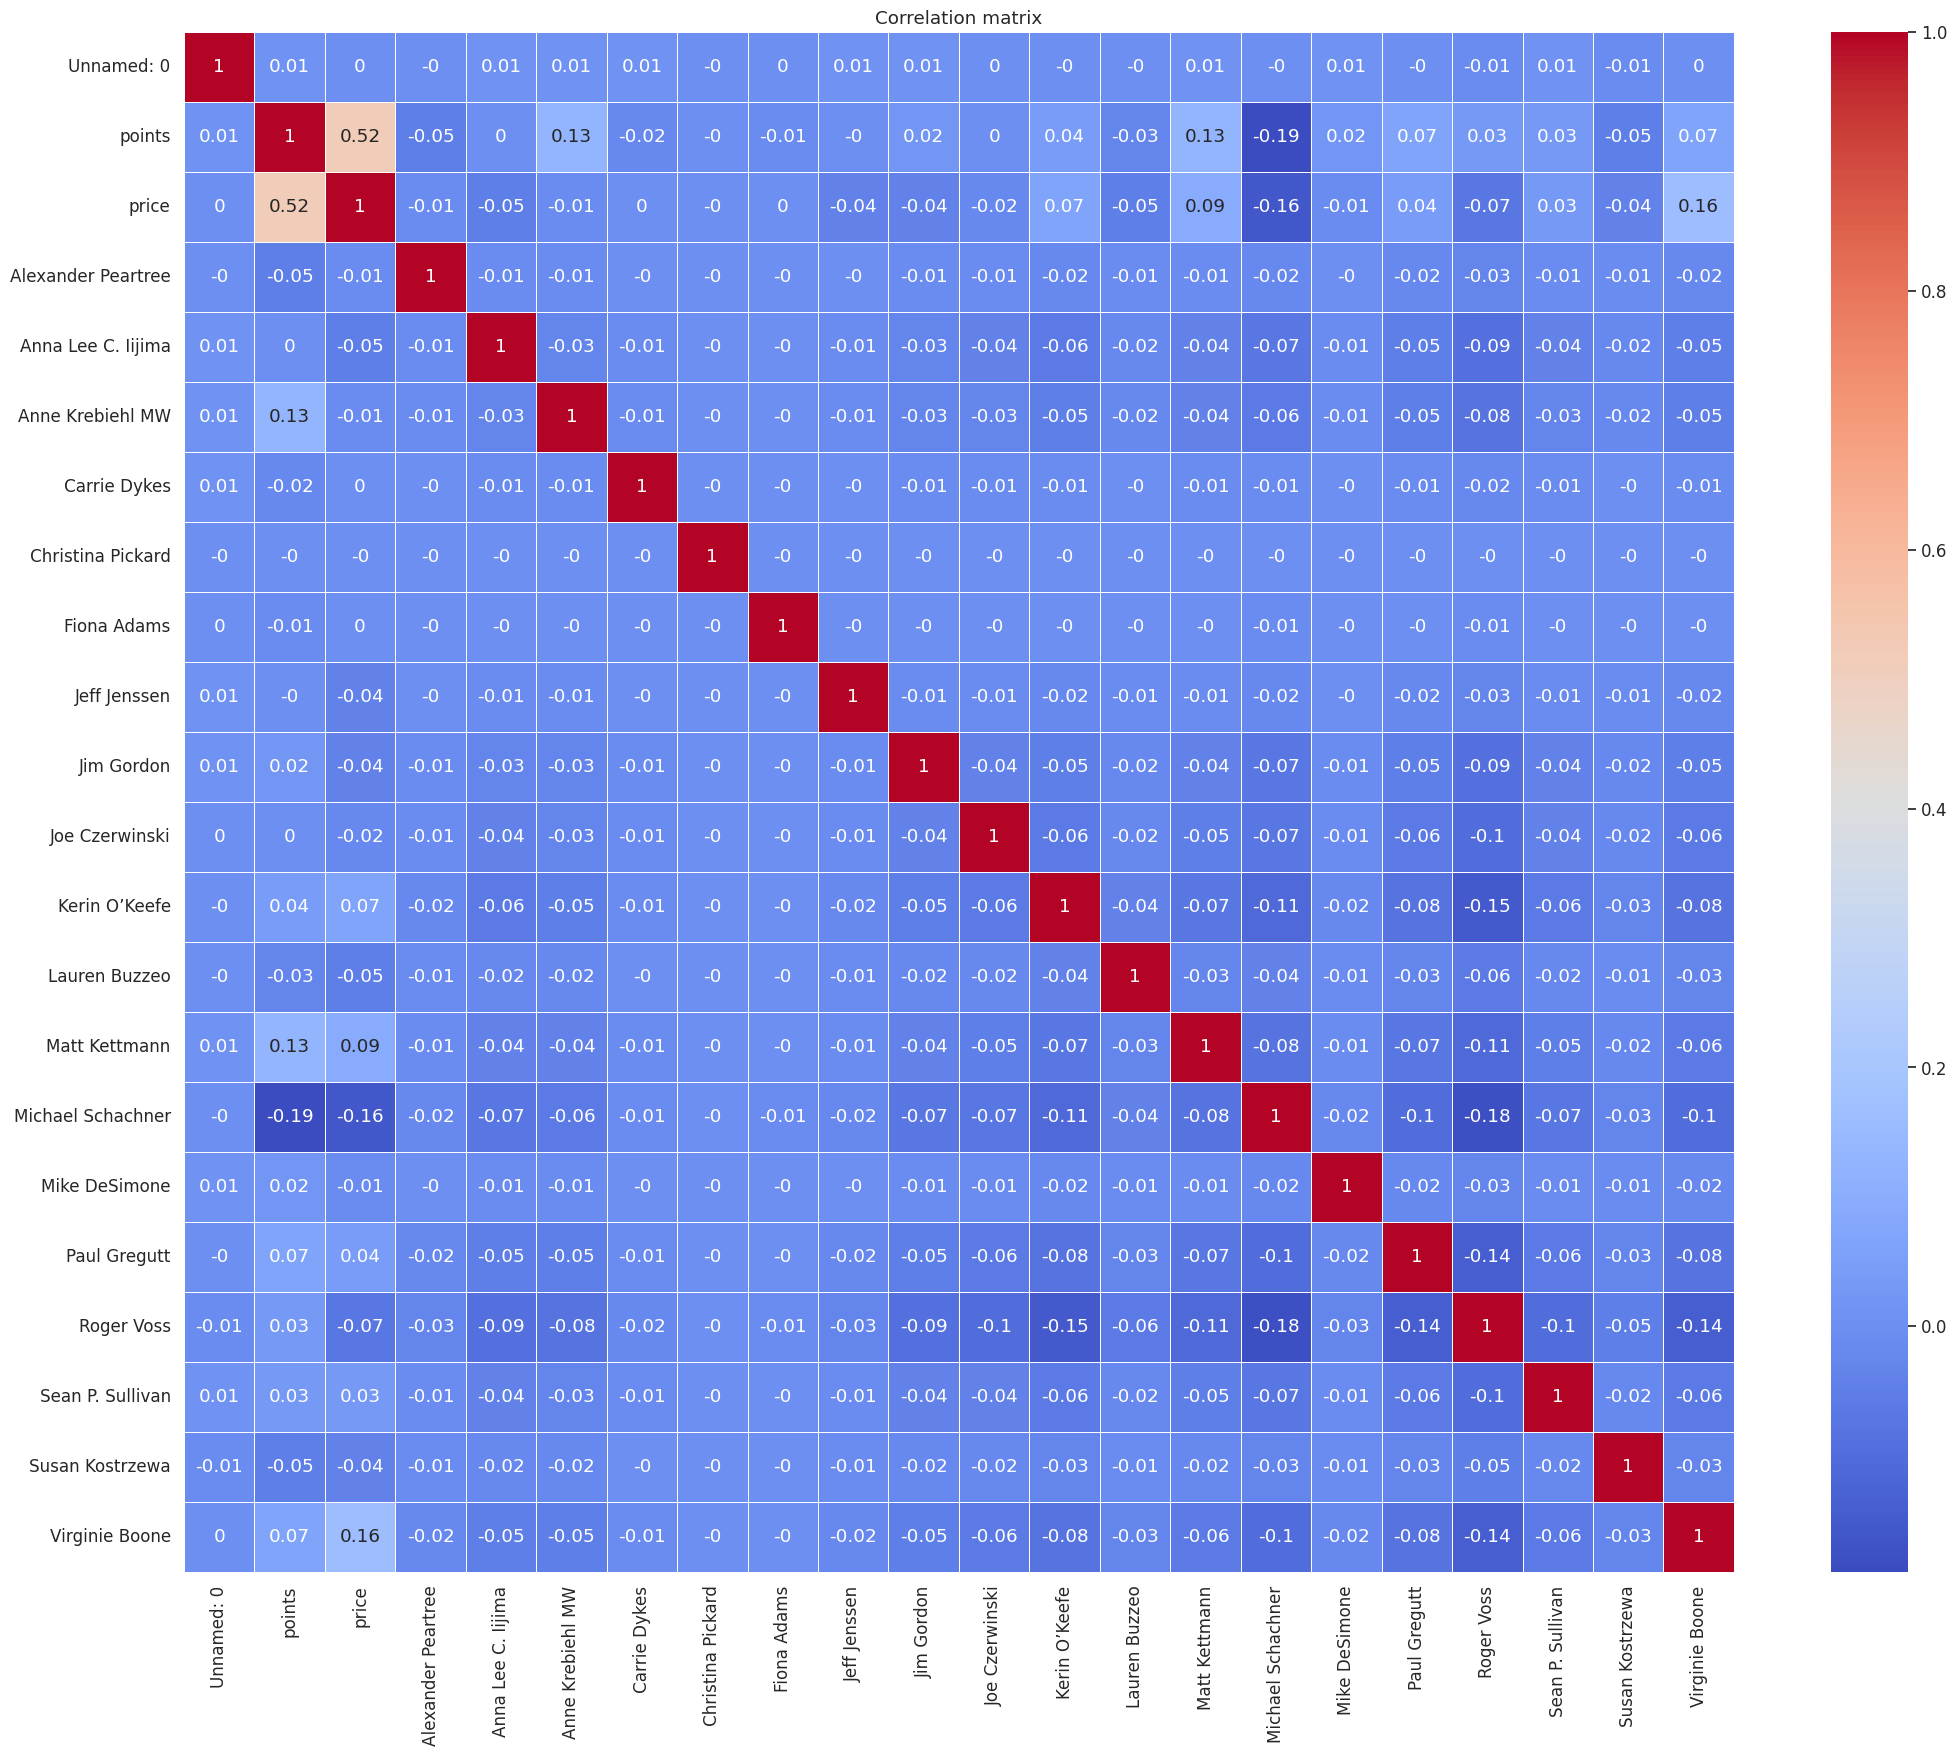

In [ ]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.1)

corr_matrix = dataset_with_tasters.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 2)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [ ]:
list_of_tasters

Index(['Alexander Peartree', 'Anna Lee C. Iijima', 'Anne Krebiehl MW',
       'Carrie Dykes', 'Christina Pickard', 'Fiona Adams', 'Jeff Jenssen',
       'Jim Gordon', 'Joe Czerwinski', 'Kerin O’Keefe', 'Lauren Buzzeo',
       'Matt Kettmann', 'Michael Schachner', 'Mike DeSimone', 'Paul Gregutt',
       'Roger Voss', 'Sean P. Sullivan', 'Susan Kostrzewa', 'Virginie Boone'],
      dtype='object')

In [ ]:
list_of_res = []
for i in combinations(list_of_tasters, 2):
  dict = {}
  dict['t1'] = i[0]
  dict['t2'] = i[1]
  wdf = dataset_with_tasters[[i[0], i[1], 'points']]
  wdf = wdf.loc[ (wdf[i[0]]==1) | (wdf[i[1]]==1) ]
  wdf1 = wdf[wdf[i[0]]==1]
  wdf2 = wdf[wdf[i[1]]==1]

  dict['va'] = var_analise(wdf, wdf1, wdf2, 'points')
  dict['t1_mean'] = wdf1['points'].mean()
  dict['t2_mean'] = wdf2['points'].mean()
  list_of_res.append(dict)

In [ ]:
resframe3 = pd.DataFrame(list_of_res)
resframe3[resframe3['va'] == False]

,t1,t2,va,t1_mean,t2_mean
20,Anna Lee C. Iijima,Christina Pickard,False,88.335023,87.833333
22,Anna Lee C. Iijima,Jeff Jenssen,False,88.335023,88.268595
24,Anna Lee C. Iijima,Joe Czerwinski,False,88.335023,88.365987
51,Carrie Dykes,Christina Pickard,False,86.395683,87.833333
52,Carrie Dykes,Fiona Adams,False,86.395683,86.888889
59,Carrie Dykes,Michael Schachner,False,86.395683,86.800904
64,Carrie Dykes,Susan Kostrzewa,False,86.395683,86.594820
66,Christina Pickard,Fiona Adams,False,87.833333,86.888889
67,Christina Pickard,Jeff Jenssen,False,87.833333,88.268595
68,Christina Pickard,Jim Gordon,False,87.833333,88.596052


Из графика разброса видно, что мнения критиков сильно разнятся в большинстве случаев от критика зависит оценка вина (красные точки).

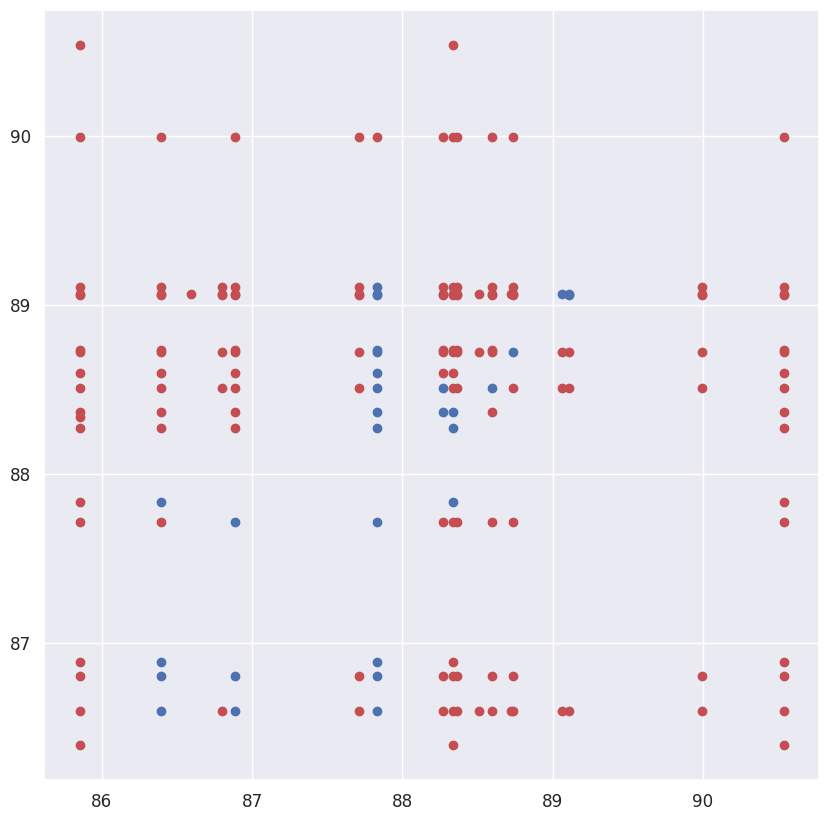

In [ ]:
plt.figure(figsize = (10,10))

plt.scatter(resframe3.loc[resframe3['va'] == True, 't1_mean'], resframe3.loc[resframe3['va'] == True, 't2_mean'], color = 'r')
plt.scatter(resframe3.loc[resframe3['va'] == False, 't1_mean'], resframe3.loc[resframe3['va'] == False, 't2_mean'], color = 'b')


#Итог
Оценки вина распределены нормально, в отличие от цен. Благодаря этому можно провести дисперсионный анализ и выявить, что на оценку влияет множество факторов таких как страна производства и критик, поэтому итальянское вино, оцененое Анной Ли может иметь завышенную оценку только потому что оно итальянское и оценено Анной Ли. \
\
Редко встречаемое вино имеет цену и оценку ниже средней, откуда и следует непопулярность этого вина. \
И еще кое-что: Качество вина зависит от его цены, что неудивительно